<a href="https://colab.research.google.com/github/Siddhes2/TechNext_Task/blob/task6/TechNext_Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [ ]:
data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.corr()

ValueError: could not convert string to float: 'Male'

In [ ]:
data['Gender'].to_string

<bound method Series.to_string of 0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object>

In [ ]:
data.corr

<bound method DataFrame.corr of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data["Gender"].value_counts()

,count
Gender,
Female,112
Male,88


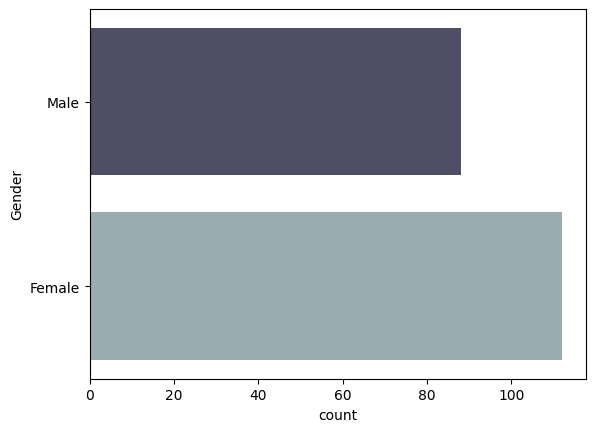

In [ ]:
sns.countplot(data["Gender"], palette="bone")
plt.show()

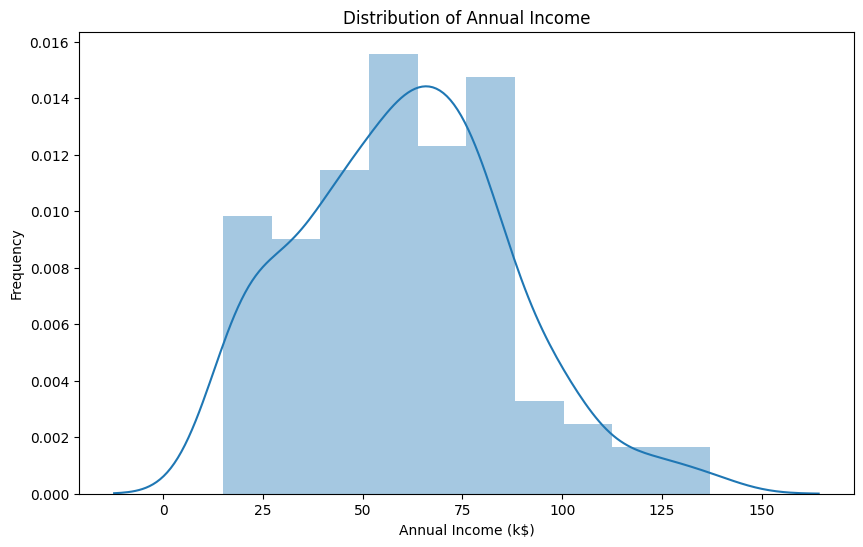

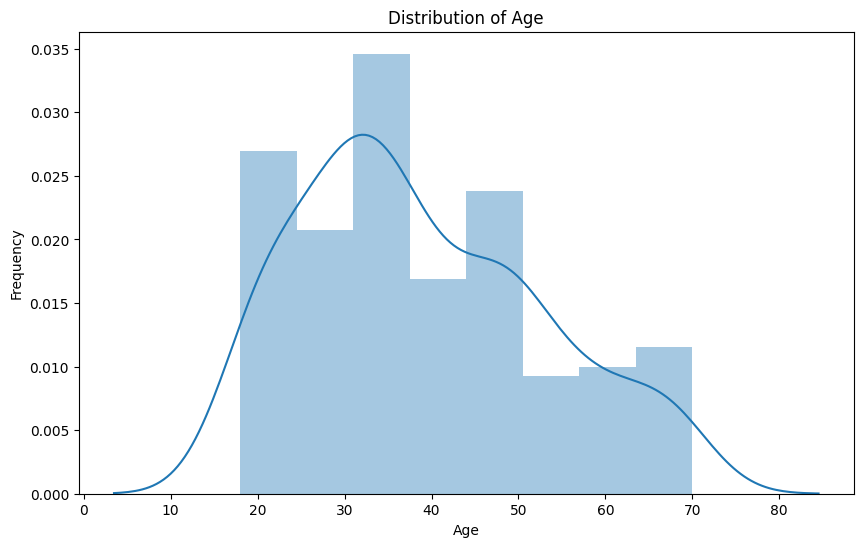

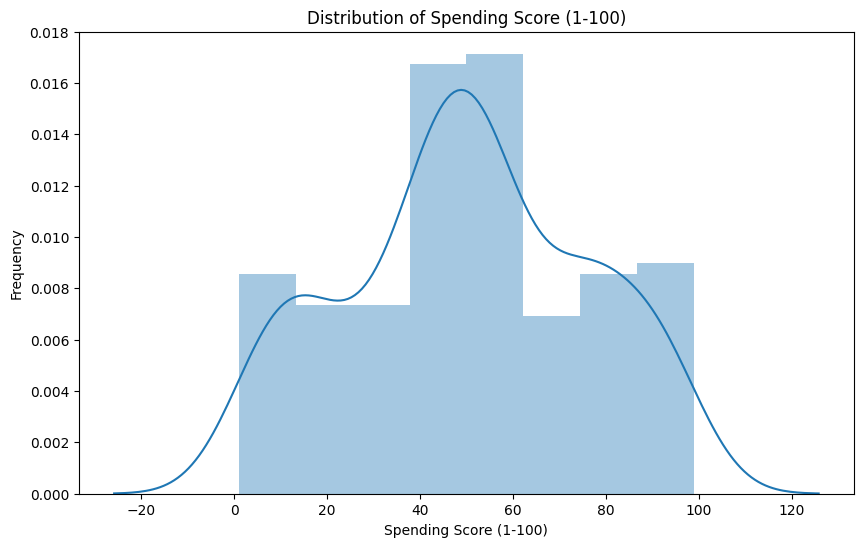

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(data["Annual Income (k$)"])
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(data["Age"])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(data["Spending Score (1-100)"])
plt.title("Distribution of Spending Score (1-100)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Frequency")
plt.show()

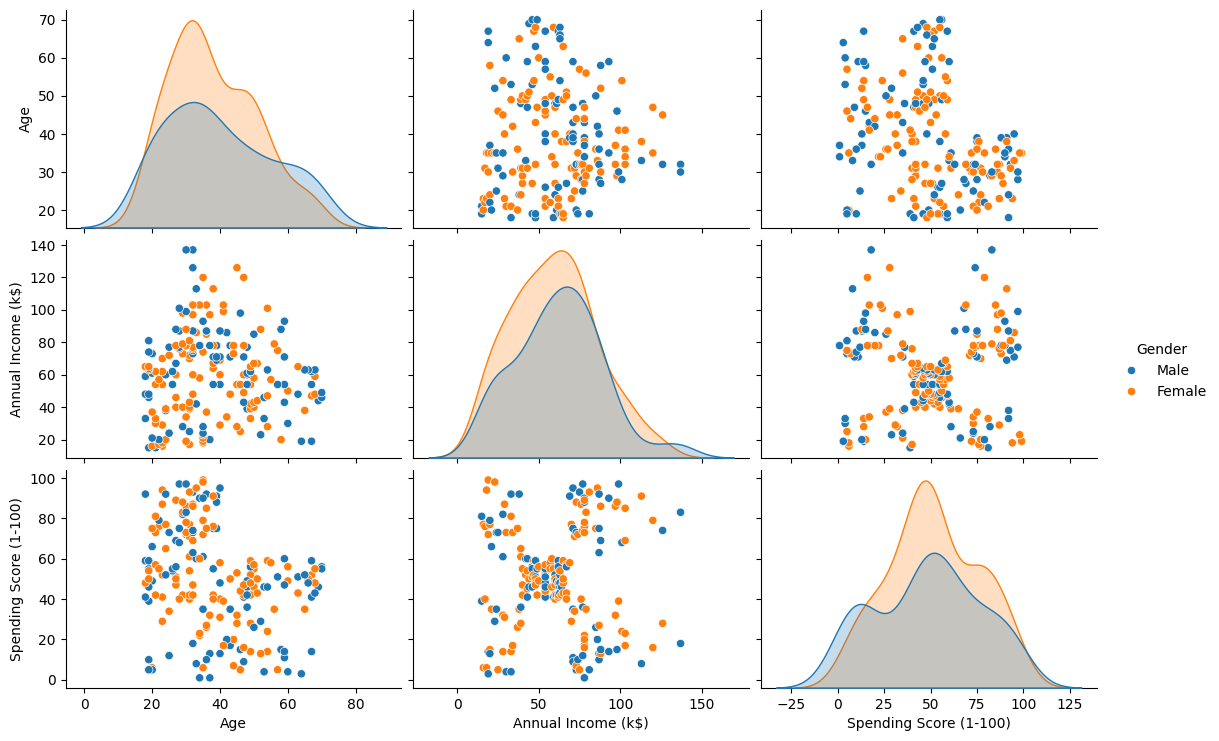

In [ ]:
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

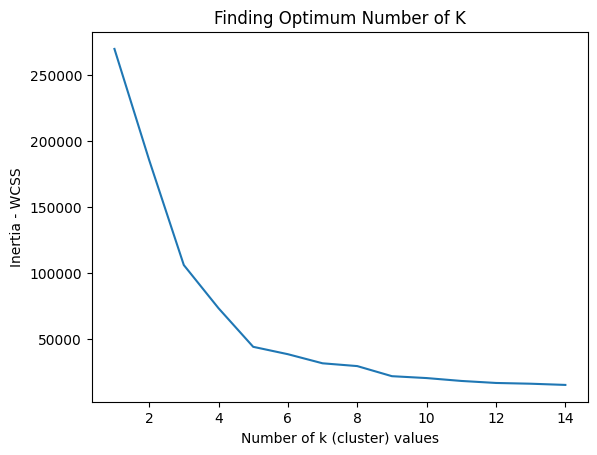

In [ ]:
from sklearn.cluster import KMeans
x_data1 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
wcss = []
for k in range(1,15):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(x_data1)
    wcss.append(kmean.inertia_)

plt.plot(range(1,15), wcss)
plt.xlabel("Number of k (cluster) values")
plt.ylabel("Inertia - WCSS")
plt.title("Finding Optimum Number of K")
plt.show()

In [ ]:
kmean_x_data1 = KMeans(n_clusters=5, random_state=0)
clusters = kmean_x_data1.fit_predict(x_data1)
data["Label1"] = clusters

In [ ]:
data.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label1
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4


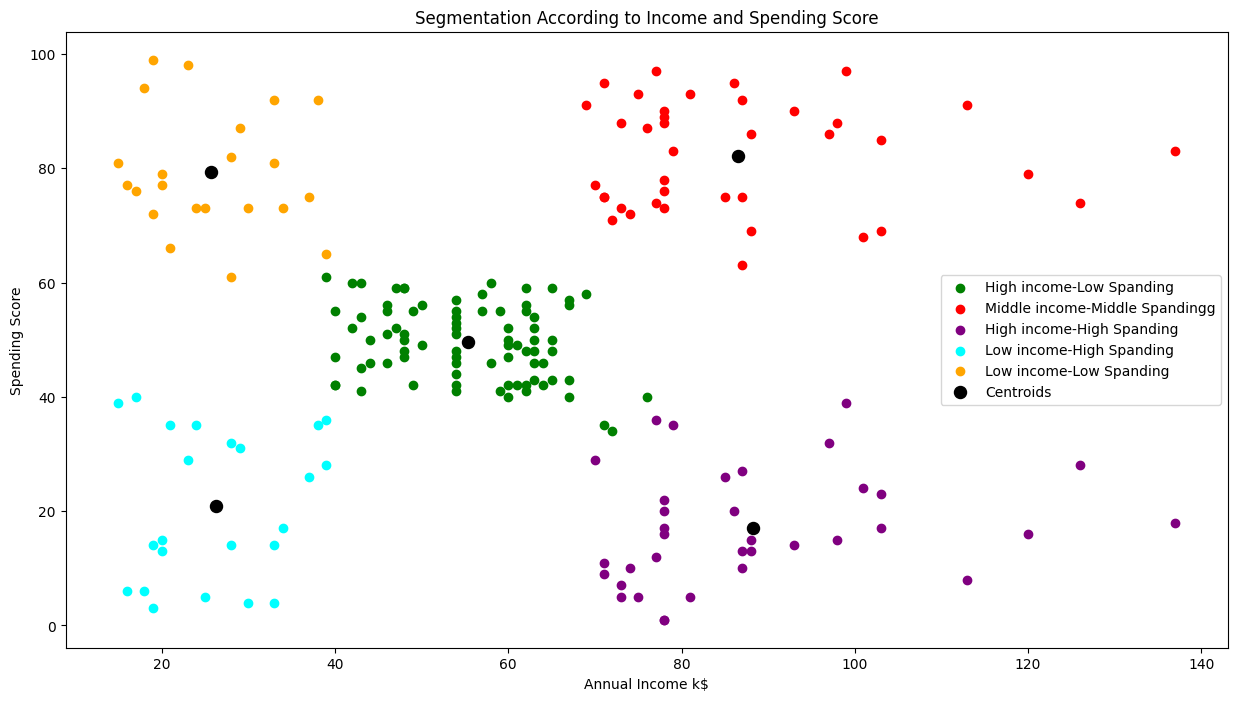

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x_data1[clusters == 0,0 ],x_data1[clusters == 0,1 ],color = "green", label = "High income-Low Spanding")
plt.scatter(x_data1[clusters == 1,0 ],x_data1[clusters == 1,1 ],color = "red", label = "Middle income-Middle Spandingg")
plt.scatter(x_data1[clusters == 2,0 ],x_data1[clusters == 2,1 ],color = "purple", label = "High income-High Spanding")
plt.scatter(x_data1[clusters == 3,0 ],x_data1[clusters == 3,1 ],color = "cyan", label = "Low income-High Spanding")
plt.scatter(x_data1[clusters == 4,0 ],x_data1[clusters == 4,1 ],color = "orange", label = "Low income-Low Spanding")
plt.scatter(kmean_x_data1.cluster_centers_[:,0], kmean_x_data1.cluster_centers_[:,1], color="black", label="Centroids",s =75)#0,1 x and y axis
plt.xlabel("Annual Income k$")
plt.ylabel("Spending Score")
plt.legend()
plt.title("Segmentation According to Income and Spending Score")
plt.show()

In [ ]:
data[(data["Label1"]<3) & (data["Label1"]>1)].groupby("CustomerID").head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label1
124,125,Female,23,70,29,2
128,129,Male,59,71,11,2
130,131,Male,47,71,9,2
134,135,Male,20,73,5,2
136,137,Female,44,73,7,2
138,139,Male,19,74,10,2
140,141,Female,57,75,5,2
144,145,Male,25,77,12,2
146,147,Male,48,77,36,2
148,149,Female,34,78,22,2


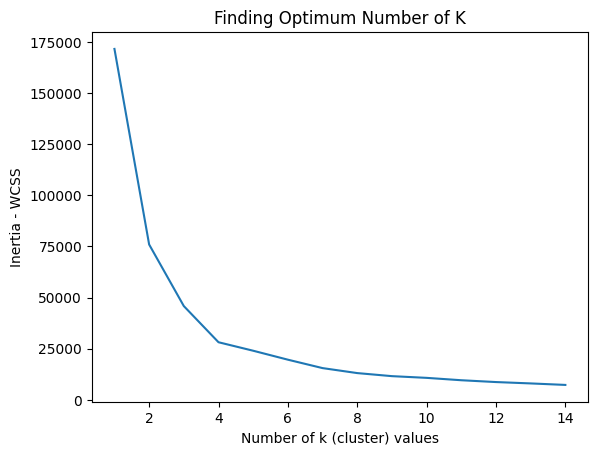

In [ ]:
from sklearn.cluster import KMeans
x_data2 = data[['Age', 'Spending Score (1-100)']].iloc[: , :].values
wcss2 = []
for k in range(1,15):
    kmean2 = KMeans(n_clusters=k, random_state=0)
    kmean2.fit(x_data2)
    wcss2.append(kmean2.inertia_)

plt.plot(range(1,15), wcss2)
plt.xlabel("Number of k (cluster) values")
plt.ylabel("Inertia - WCSS")
plt.title("Finding Optimum Number of K")
plt.show()

In [ ]:
kmean_x_data2 = KMeans(n_clusters=4, random_state=0)
clusters2 = kmean_x_data2.fit_predict(x_data2)
data["Label2"] = clusters2

In [ ]:

data.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label1,Label2
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,1


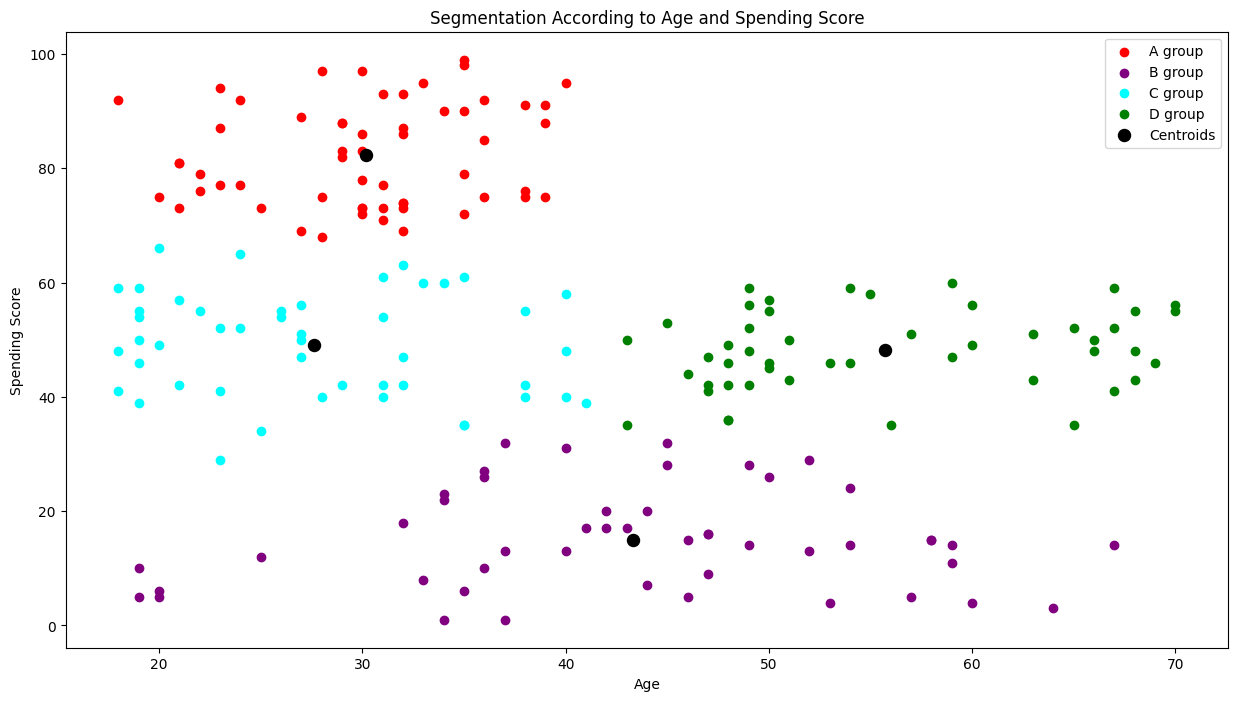

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x_data2[clusters2 == 1,0 ],x_data2[clusters2 == 1,1 ],color = "red", label = "A group")
plt.scatter(x_data2[clusters2 == 2,0 ],x_data2[clusters2 == 2,1 ],color = "purple", label = "B group")
plt.scatter(x_data2[clusters2 == 3,0 ],x_data2[clusters2 == 3,1 ],color = "cyan", label = "C group")
plt.scatter(x_data2[clusters2 == 0,0 ],x_data2[clusters2 == 0,1 ],color = "green", label = "D group")
plt.scatter(kmean_x_data2.cluster_centers_[:,0], kmean_x_data2.cluster_centers_[:,1], color="black", label="Centroids", s=75)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend()
plt.title("Segmentation According to Age and Spending Score")
plt.show()

In [ ]:
data[(data["Label1"]<3) & (data["Label1"]>1)].groupby("CustomerID").head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label1,Label2
124,125,Female,23,70,29,2,3
128,129,Male,59,71,11,2,2
130,131,Male,47,71,9,2,2
134,135,Male,20,73,5,2,2
136,137,Female,44,73,7,2,2
138,139,Male,19,74,10,2,2
140,141,Female,57,75,5,2,2
144,145,Male,25,77,12,2,2
146,147,Male,48,77,36,2,0
148,149,Female,34,78,22,2,2
